In [1]:
import pandas as pd
import numpy as np

**Obtener los datos del período 2000-2010 de la deuda externa (DT.DOD.DECT.CD
(http://DT.DOD.DECT.CD)) por países ("Country Name"), transponer las columnas a filas y
dibujar las series. ¿La visualización nos dice algo? ¿Es adecuada?**

*Utilizamos el parámetro encoding = "utf-8-sig" de pd.read_csv() puesto que, al dejarlo por defecto, genera problemas a la hora de cargar el nombre de la primera columna del dataframe ('\xef\xbb\xbf"Country Name"').*

In [2]:
debt = pd.read_csv('data.csv', sep = ';', header = 0, encoding="utf-8-sig")

In [3]:
debt

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,Average interest on new external debt commitme...,DT.INR.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Average maturity on new external debt commitme...,DT.MAT.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28034 entries, 0 to 28033
Data columns (total 60 columns):
Country Name      28034 non-null object
Country Code      28034 non-null object
Indicator Name    28034 non-null object
Indicator Code    28034 non-null object
1970              17328 non-null float64
1971              17676 non-null float64
1972              18054 non-null float64
1973              18075 non-null float64
1974              18174 non-null float64
1975              18293 non-null float64
1976              18430 non-null float64
1977              18816 non-null float64
1978              19246 non-null float64
1979              19289 non-null float64
1980              19359 non-null float64
1981              20878 non-null float64
1982              20930 non-null float64
1983              20932 non-null float64
1984              21136 non-null float64
1985              21341 non-null float64
1986              21357 non-null float64
1987              21368 non-null f

*Comprobamos la tipología de los datos para ver si es posible empezar con los cálculos.*

In [5]:
type(debt['1970'][0]), type(debt['1970'][28017]), type(debt['Country Name'][1])

(numpy.float64, numpy.float64, unicode)

In [6]:
ext_debt = debt[debt['Indicator Code'] == 'DT.DOD.DECT.CD']

In [7]:
ext_debt

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
53,Afghanistan,AFG,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Albania,ALB,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,Algeria,DZA,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,9.395590e+08,1.260811e+09,1.549797e+09,2.991380e+09,3.365978e+09,4.632813e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,All developing countries,LMY,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,5.931777e+10,6.984151e+10,8.178557e+10,9.930977e+10,1.251400e+11,1.546356e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,Angola,AGO,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123,Armenia,ARM,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,Azerbaijan,AZE,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551,Bangladesh,BGD,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,1.465040e+08,4.978210e+08,1.257485e+09,1.680487e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765,Belarus,BLR,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,Belize,BLZ,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,4.085000e+06,4.339000e+06,5.070000e+06,4.826000e+06,5.274000e+06,4.827000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ext_debt['Country Name'].tolist()

[u'Afghanistan',
 u'Albania',
 u'Algeria',
 u'All developing countries',
 u'Angola',
 u'Armenia',
 u'Azerbaijan',
 u'Bangladesh',
 u'Belarus',
 u'Belize',
 u'Benin',
 u'Bhutan',
 u'Bolivia',
 u'Bosnia and Herzegovina',
 u'Botswana',
 u'Brazil',
 u'Bulgaria',
 u'Burkina Faso',
 u'Burundi',
 u'Cabo Verde',
 u'Cambodia',
 u'Cameroon',
 u'Central African Republic',
 u'Chad',
 u'China',
 u'Colombia',
 u'Comoros',
 u'Congo, Dem. Rep.',
 u'Congo, Rep.',
 u'Costa Rica',
 u"Cote d'Ivoire",
 u'Djibouti',
 u'Dominica',
 u'Dominican Republic',
 u'East Asia & Pacific',
 u'Ecuador',
 u'Egypt, Arab Rep.',
 u'El Salvador',
 u'Eritrea',
 u'Ethiopia',
 u'Europe & Central Asia',
 u'Fiji',
 u'Gabon',
 u'Gambia, The',
 u'Georgia',
 u'Ghana',
 u'Grenada',
 u'Guatemala',
 u'Guinea',
 u'Guinea-Bissau',
 u'Guyana',
 u'Haiti',
 u'Honduras',
 u'India',
 u'Indonesia',
 u'Iran, Islamic Rep.',
 u'Jamaica',
 u'Jordan',
 u'Kazakhstan',
 u'Kenya',
 u'Kosovo',
 u'Kyrgyz Republic',
 u'Lao PDR',
 u'Latin America & Caribb

*Seleccionamos el subset necesario para la representación gráfica*

In [9]:
ext_debt_2010 = ext_debt[['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [10]:
ext_debt_2010

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
53,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,9.691970e+08,2.012885e+09,2.133805e+09,2.469925e+09,2.423336e+09
267,Albania,1.122296e+09,1.154850e+09,1.181526e+09,1.552159e+09,1.606136e+09,2.101163e+09,2.465359e+09,2.897759e+09,4.238095e+09,4.310066e+09,5.200642e+09
481,Algeria,2.547693e+10,2.276389e+10,2.304022e+10,2.377485e+10,2.242665e+10,1.709240e+10,5.910801e+09,6.134509e+09,6.246392e+09,7.405467e+09,7.246004e+09
695,All developing countries,1.742960e+12,1.756875e+12,1.820742e+12,1.953504e+12,2.081974e+12,2.089796e+12,2.267447e+12,2.693260e+12,2.908884e+12,3.175081e+12,3.665542e+12
909,Angola,9.763470e+09,8.776913e+09,9.110398e+09,9.099853e+09,9.786141e+09,1.222396e+10,9.890494e+09,1.193168e+10,1.550157e+10,1.701427e+10,1.694909e+10
1123,Armenia,1.009643e+09,1.401649e+09,1.711690e+09,1.994268e+09,2.106357e+09,1.968027e+09,2.136305e+09,3.078652e+09,3.609238e+09,4.932598e+09,6.304487e+09
1337,Azerbaijan,1.524261e+09,1.459853e+09,1.626957e+09,1.876746e+09,2.019786e+09,2.118242e+09,2.687517e+09,3.728508e+09,4.465748e+09,4.754598e+09,7.028983e+09
1551,Bangladesh,1.559607e+10,1.492421e+10,1.663286e+10,1.838549e+10,1.965923e+10,1.844882e+10,2.010578e+10,2.137264e+10,2.292939e+10,2.459598e+10,2.575168e+10
1765,Belarus,2.604108e+09,2.780349e+09,3.378292e+09,3.760979e+09,4.584153e+09,5.283532e+09,6.543942e+09,1.248816e+10,1.512151e+10,2.205383e+10,2.839688e+10
1979,Belize,5.279020e+08,5.978810e+08,6.973290e+08,9.095300e+08,9.278910e+08,9.888200e+08,1.023887e+09,1.048500e+09,1.252490e+09,1.270864e+09,1.286915e+09


In [11]:
ext_debt_bycountry = ext_debt_2010.set_index('Country Name').T

In [12]:
ext_debt_bycountry

Country Name,Afghanistan,Albania,Algeria,All developing countries,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,...,Turkmenistan,Uganda,Ukraine,Upper middle income,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,NaN,1.122296e+09,2.547693e+10,1.742960e+12,9.763470e+09,1.009643e+09,1.524261e+09,1.559607e+10,2.604108e+09,5.279020e+08,...,2.509436e+09,3.535146e+09,1.389009e+10,1.043220e+12,4.979871e+09,95670000.0,1.285928e+10,5.162399e+09,5.811476e+09,3.832043e+09
2001,NaN,1.154850e+09,2.276389e+10,1.756875e+12,8.776913e+09,1.401649e+09,1.459853e+09,1.492421e+10,2.780349e+09,5.978810e+08,...,2.229529e+09,3.768223e+09,2.218211e+10,1.076943e+12,5.208444e+09,92032000.0,1.261666e+10,5.197891e+09,6.189777e+09,3.644778e+09
2002,NaN,1.181526e+09,2.304022e+10,1.820742e+12,9.110398e+09,1.711690e+09,1.626957e+09,1.663286e+10,3.378292e+09,6.973290e+08,...,2.060367e+09,4.014527e+09,2.342315e+10,1.116698e+12,5.151824e+09,112584000.0,1.334681e+10,5.337942e+09,6.674671e+09,3.978768e+09
2003,NaN,1.552159e+09,2.377485e+10,1.953504e+12,9.099853e+09,1.994268e+09,1.876746e+09,1.838549e+10,3.760979e+09,9.095300e+08,...,1.889766e+09,4.565233e+09,2.574826e+10,1.194071e+12,5.295598e+09,121146000.0,1.595835e+10,5.524634e+09,6.874318e+09,4.603900e+09
2004,NaN,1.606136e+09,2.242665e+10,2.081974e+12,9.786141e+09,2.106357e+09,2.019786e+09,1.965923e+10,4.584153e+09,9.278910e+08,...,1.630781e+09,4.769348e+09,3.068915e+10,1.294476e+12,5.215731e+09,145931000.0,1.799307e+10,5.616361e+09,7.540235e+09,4.953634e+09
2005,NaN,2.101163e+09,1.709240e+10,2.089796e+12,1.222396e+10,1.968027e+09,2.118242e+09,1.844882e+10,5.283532e+09,9.888200e+08,...,1.157800e+09,4.436715e+09,3.370593e+10,1.343201e+12,4.655813e+09,105348000.0,1.903868e+10,5.500561e+09,5.458981e+09,4.444631e+09
2006,9.691970e+08,2.465359e+09,5.910801e+09,2.267447e+12,9.890494e+09,2.136305e+09,2.687517e+09,2.010578e+10,6.543942e+09,1.023887e+09,...,9.910510e+08,1.276225e+09,5.248666e+10,1.507680e+12,4.487901e+09,107584000.0,1.864855e+10,5.705769e+09,2.375621e+09,4.908101e+09
2007,2.012885e+09,2.897759e+09,6.134509e+09,2.693260e+12,1.193168e+10,3.078652e+09,3.728508e+09,2.137264e+10,1.248816e+10,1.048500e+09,...,8.537490e+08,1.628567e+09,7.892908e+10,1.811890e+12,4.647813e+09,123899000.0,2.328472e+10,6.152424e+09,2.857153e+09,5.707379e+09
2008,2.133805e+09,4.238095e+09,6.246392e+09,2.908884e+12,1.550157e+10,3.609238e+09,4.465748e+09,2.292939e+10,1.512151e+10,1.252490e+09,...,7.457210e+08,2.268362e+09,9.826630e+10,1.942263e+12,5.108326e+09,150881000.0,2.648763e+10,6.318635e+09,3.079658e+09,5.710814e+09
2009,2.469925e+09,4.310066e+09,7.405467e+09,3.175081e+12,1.701427e+10,4.932598e+09,4.754598e+09,2.459598e+10,2.205383e+10,1.270864e+09,...,6.614750e+08,2.738678e+09,1.043271e+11,2.102098e+12,6.961540e+09,155309000.0,3.308383e+10,6.734195e+09,3.774356e+09,6.000141e+09


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 4)

Populating the interactive namespace from numpy and matplotlib


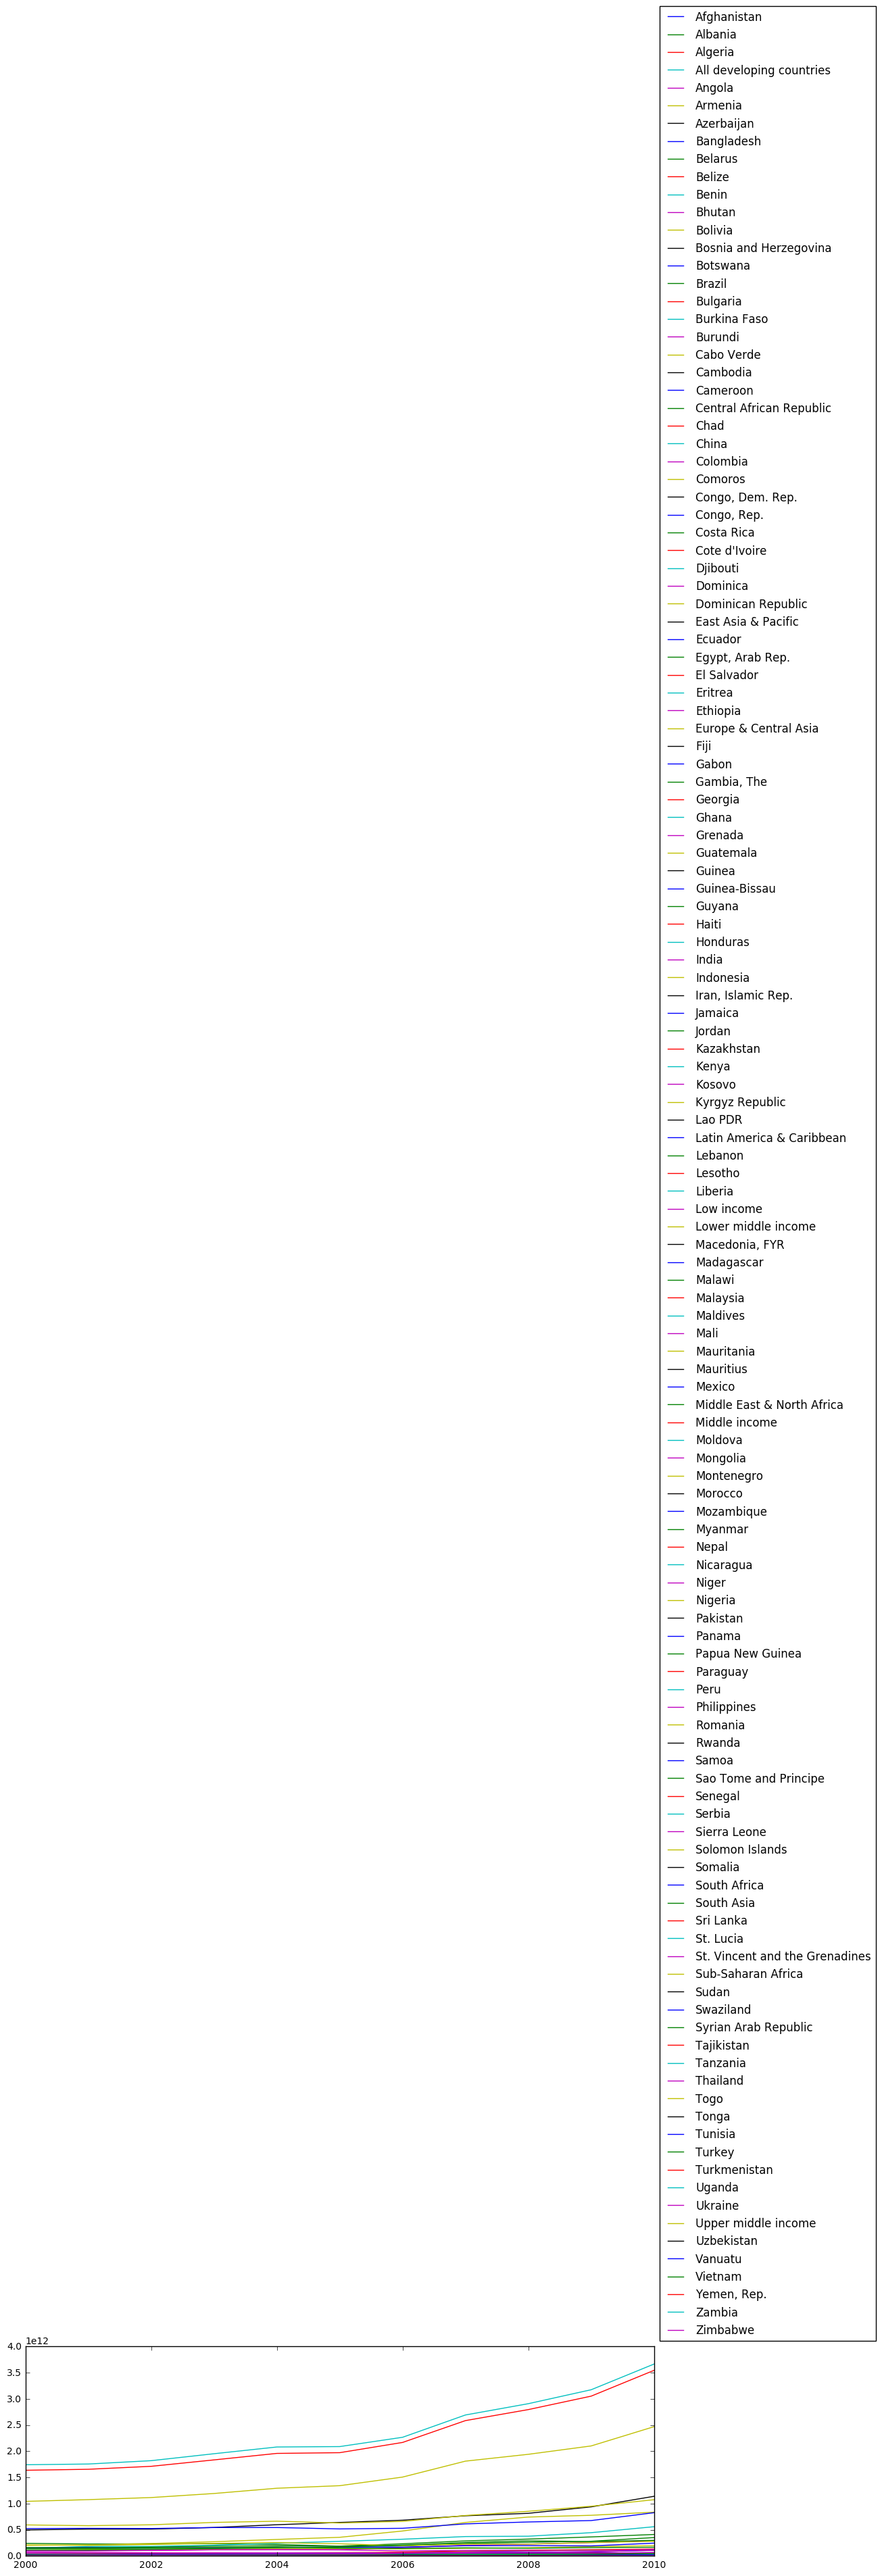

In [14]:
plt.plot(ext_debt_bycountry)
plt.legend(ext_debt['Country Name'].tolist(), bbox_to_anchor=[1, 1], loc='lower left')

*La visualización de las series temporales respecto a la evolución de la deuda por país no resulta muy útil dada la gran cantidad de países recogidos en la muestra. Al mismo tiempo la escala, dado el rango tan grande que pueden tomar los valores, apenas permite hacer una valoración cuantitativa.*

**Obtener los cuatro países de mayor deuda en 2010 y los cuatro de menos (descartar previamente
lo que no sean países sino agrupaciones de países). Volver a dibujar como en el apartado anterior,
pero solo los ocho seleccionados.**

*Accedemos por índice a los datos del subset correspondientes a 2010 y los ordenamos descendentemente*

In [15]:
(ext_debt_bycountry.ix[10]).sort_values(ascending=False)

Country Name
All developing countries          3.665542e+12
Middle income                     3.545136e+12
Upper middle income               2.469823e+12
East Asia & Pacific               1.140167e+12
Lower middle income               1.075314e+12
Europe & Central Asia             8.372894e+11
Latin America & Caribbean         8.272436e+11
China                             5.597721e+11
South Asia                        4.113085e+11
Brazil                            3.523644e+11
Turkey                            2.991132e+11
India                             2.916505e+11
Sub-Saharan Africa                2.816149e+11
Mexico                            2.459065e+11
Indonesia                         1.982683e+11
Middle East & North Africa        1.679180e+11
Malaysia                          1.337996e+11
Ukraine                           1.250828e+11
Low income                        1.204056e+11
Kazakhstan                        1.191445e+11
Romania                           1.153926e+11


In [16]:
top_12 = (((ext_debt_bycountry.ix[10]).sort_values(ascending=False)).head(12))

In [17]:
top_12

Country Name
All developing countries     3.665542e+12
Middle income                3.545136e+12
Upper middle income          2.469823e+12
East Asia & Pacific          1.140167e+12
Lower middle income          1.075314e+12
Europe & Central Asia        8.372894e+11
Latin America & Caribbean    8.272436e+11
China                        5.597721e+11
South Asia                   4.113085e+11
Brazil                       3.523644e+11
Turkey                       2.991132e+11
India                        2.916505e+11
Name: 2010, dtype: float64

In [18]:
top_4 = top_12.drop(top_12.index[[0,1,2,3,4,5,6,8]])

In [19]:
top_4

Country Name
China     5.597721e+11
Brazil    3.523644e+11
Turkey    2.991132e+11
India     2.916505e+11
Name: 2010, dtype: float64

In [20]:
bottom_4 = ((ext_debt_bycountry.ix[10]).sort_values(ascending=False)).tail(4)

In [21]:
bottom_4

Country Name
Solomon Islands          230757000.0
Sao Tome and Principe    180881000.0
Vanuatu                  173330000.0
Tonga                    153651000.0
Name: 2010, dtype: float64

In [22]:
selected_8 = [top_4, bottom_4]
selected_8 = pd.concat(selected_8)

In [23]:
selected_8

Country Name
China                    5.597721e+11
Brazil                   3.523644e+11
Turkey                   2.991132e+11
India                    2.916505e+11
Solomon Islands          2.307570e+08
Sao Tome and Principe    1.808810e+08
Vanuatu                  1.733300e+08
Tonga                    1.536510e+08
Name: 2010, dtype: float64

*Procedemos a la representación del top 4 y el bottom 4 en dos gráficos separados (vía subplots) porque dada la diferencia de magnitudes entre ambos (1e11 vs 1e8) no se ven aquellos de menor deuda si han de compartir el eje y su escala.*

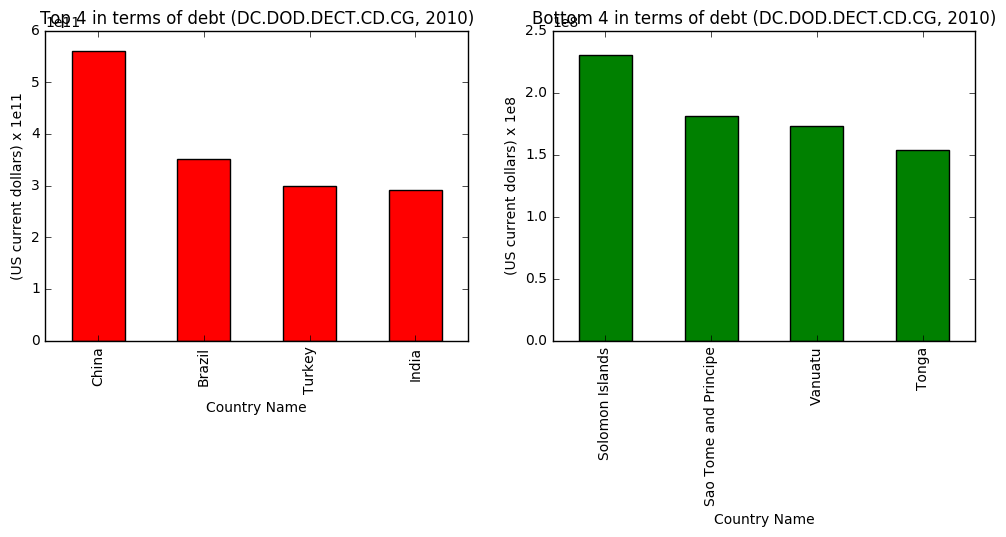

In [24]:
plt.subplot(121)
top_4.plot(kind = 'bar', color = 'r')
plt.title('Top 4 in terms of debt (DC.DOD.DECT.CD.CG, 2010)')
plt.ylabel('(US current dollars) x 1e11')

plt.subplot(122)
bottom_4.plot(kind = 'bar', color = 'g')
plt.title('Bottom 4 in terms of debt (DC.DOD.DECT.CD.CG, 2010)')
plt.ylabel('(US current dollars) x 1e8')

**Conseguir en Internet la población de los países anteriores (copiar los valores "a mano" en un
fichero de texto, y fusionarlos con la tabla existente mediante el "Country Code".) y observar si
hay correlación o algún tipo de relación entre la población y la deuda externa.**

In [25]:
pobl = pd.read_table('pobl_2010.txt', header=None, sep = ',', names = ('Country Name', 'Population'))

In [26]:
pobl

,Country Name,Population
0,China,1338000000
1,Brazil,195200000
2,Turkey,72140000
3,India,1206000000
4,Solomon Islands,526447
5,Sao Tome and Principe,178228
6,Vanuatu,236299
7,Tonga,104098


In [27]:
type(pobl['Population'][2])

numpy.int64

In [28]:
selected_8

Country Name
China                    5.597721e+11
Brazil                   3.523644e+11
Turkey                   2.991132e+11
India                    2.916505e+11
Solomon Islands          2.307570e+08
Sao Tome and Principe    1.808810e+08
Vanuatu                  1.733300e+08
Tonga                    1.536510e+08
Name: 2010, dtype: float64

In [29]:
pobl.set_index('Country Name')

,Population
Country Name,
China,1338000000
Brazil,195200000
Turkey,72140000
India,1206000000
Solomon Islands,526447
Sao Tome and Principe,178228
Vanuatu,236299
Tonga,104098


In [30]:
debt_p = pd.concat((selected_8, pobl.set_index('Country Name')), axis = 1)

In [31]:
debt_p

,2010,Population
Country Name,,
China,5.597721e+11,1338000000
Brazil,3.523644e+11,195200000
Turkey,2.991132e+11,72140000
India,2.916505e+11,1206000000
Solomon Islands,2.307570e+08,526447
Sao Tome and Principe,1.808810e+08,178228
Vanuatu,1.733300e+08,236299
Tonga,1.536510e+08,104098


*Relationship between 2010 debt amount and population*

Populating the interactive namespace from numpy and matplotlib


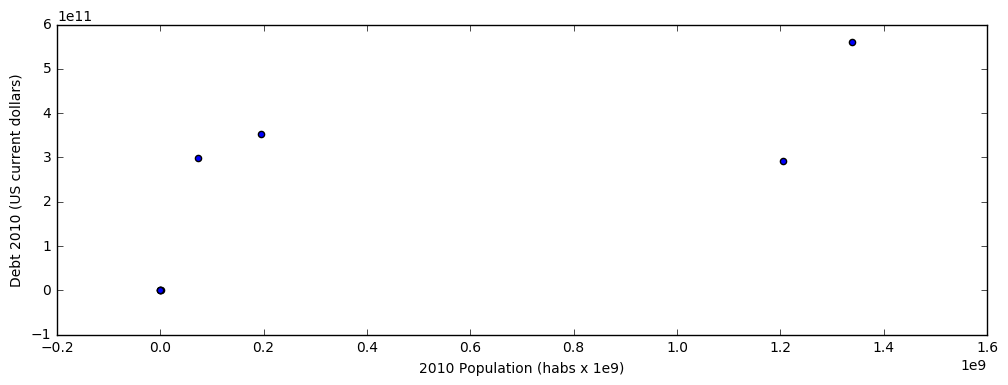

In [32]:
x = debt_p['Population']
y = debt_p['2010']
%pylab inline
pylab.rcParams['figure.figsize'] = (12,4)
plt.scatter(x,y)
plt.xlabel('2010 Population (habs x 1e9)')
plt.ylabel('Debt 2010 (US current dollars)')

In [33]:
debt_p[['Population', '2010']].corr(method = 'pearson')

,Population,2010
Population,1.000000,0.761186
2010,0.761186,1.000000


In [34]:
from scipy.stats import linregress
lr1 = linregress(debt_p['Population'], debt_p['2010'])
lr1

LinregressResult(slope=288.11562018240858, intercept=86668340821.271515, rvalue=0.76118600005959436, pvalue=0.028242724777049429, stderr=100.21503687397667)

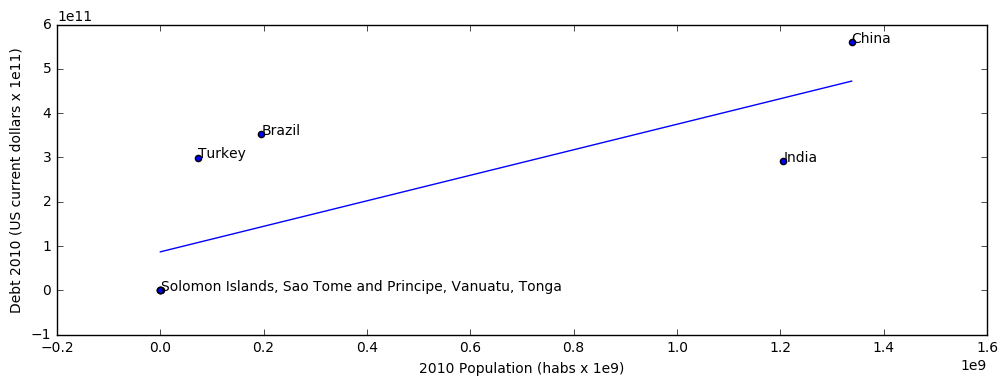

In [35]:
dp1 = debt_p['Population']
dp2 = debt_p['2010']
x1 = np.linspace(dp1.min(),dp1.max())
y1 = lr1[0]*x1 + lr1[1]
plt.scatter(dp1,dp2)
plt.plot(x1, y1)
plt.xlabel('2010 Population (habs x 1e9)')
plt.ylabel('Debt 2010 (US current dollars x 1e11)')
plt.annotate('China',  xy=(dp1[0],dp2[0]), xytext= (dp1[0],dp2[0]))
plt.annotate('Brazil',  xy=(dp1[1],dp2[1]), xytext= (dp1[1],dp2[1]))
plt.annotate('Turkey',  xy=(dp1[2],dp2[2]), xytext= (dp1[2],dp2[2]))
plt.annotate('India',  xy=(dp1[3],dp2[3]), xytext= (dp1[3],dp2[3]))
plt.annotate('Solomon Islands, Sao Tome and Principe, Vanuatu, Tonga',  xy=(dp1[4],dp2[4]), xytext= (dp1[4],dp2[4]))


*Tal y como muestra el coeficiente de correlación de Pearson (0.761) existe una relación positiva entre la población de un país y la cuantía de su deuda. Aunque los datos no se ajustan de manera muy precisa a la recta podríamos concluir que a mayor población de un país mayores son las posibilidades de tener una deuda de magnitud mayor.*

**Calcular el ratio de deuda externa con el Gross national income (GNI) para todos los países y
obtener los países que tienen un ratio más alto en la media de los años 2000 a 2010.**

*Pág XV International DEBT Statistics Manual*

*6. RATIOS*
- *External debt stocks to GNI (%) DT.DOD.DECT.GN.ZS*

In [36]:
debt_gni = debt[debt['Indicator Code']=='DT.DOD.DECT.GN.ZS']

In [37]:
debt_gni

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
45,Afghanistan,AFG,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Albania,ALB,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,Algeria,DZA,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,19.813733,25.033424,22.995781,34.625127,25.620254,30.120966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,All developing countries,LMY,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,13.080782,14.286354,14.786134,14.384712,14.396901,15.634419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,Angola,AGO,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1115,Armenia,ARM,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,Azerbaijan,AZE,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,Bangladesh,BGD,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,6.154826,10.084375,8.667890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,Belarus,BLR,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,Belize,BLZ,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,7.932500,7.618801,8.031683,6.501140,5.707937,4.562334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
debt_gni_2010 = debt_gni[['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [39]:
debt_gni_2010

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
45,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,13.648927,20.386489,20.851114,19.695033,15.146985
259,Albania,29.608244,27.259090,25.814596,26.670371,21.005272,24.600782,26.377161,26.347843,32.737362,36.362221,44.045388
473,Algeria,48.918789,42.830077,42.222792,36.347878,27.412834,17.333143,5.249152,4.605673,3.680710,5.445316,4.500724
687,All developing countries,34.628203,34.758952,34.090528,32.503006,29.603673,25.279493,23.194348,22.325023,20.357247,22.082346,20.835118
901,Angola,131.075196,119.007711,83.868711,73.018064,57.037972,50.450615,27.922159,22.671761,22.066146,24.911464,22.920798
1115,Armenia,51.395351,64.209726,69.452731,68.731018,57.175289,38.539828,31.949628,31.726505,29.216743,54.765763,64.870545
1329,Azerbaijan,30.562092,27.177576,27.804975,27.462711,25.310640,18.262375,14.684003,13.330001,10.245759,11.661313,14.218395
1543,Bangladesh,28.304134,26.827731,29.227611,29.377247,28.942363,25.439390,26.500220,25.227439,23.235135,22.238141,20.664648
1757,Belarus,20.520693,22.597078,23.192479,21.069278,19.787351,17.457233,17.759737,27.835124,25.217516,45.854758,52.530101
1971,Belize,67.779595,74.290196,80.597877,100.961055,98.595816,98.904110,93.748844,92.657255,104.075137,101.969931,102.248568


In [40]:
debt_gni_2010_bycountry = debt_gni_2010.set_index('Country Name')

In [41]:
((debt_gni_2010_bycountry.mean(axis=1)).sort_values(ascending = False)).head(20)

Country Name
Liberia                  738.563492
Sao Tome and Principe    239.039270
Guinea-Bissau            187.919206
Congo, Rep.              149.445910
Guyana                   135.973036
Lao PDR                  130.367120
Burundi                  110.630125
Mauritania               106.781397
Kyrgyz Republic          105.480373
Guinea                    99.980962
Jordan                    98.969590
Nicaragua                 93.751950
Congo, Dem. Rep.          93.167026
Belize                    92.348035
Lebanon                   91.467931
Gambia, The               88.927278
Kazakhstan                88.745170
Sierra Leone              88.103569
Bulgaria                  87.096613
Zambia                    86.077057
dtype: float64

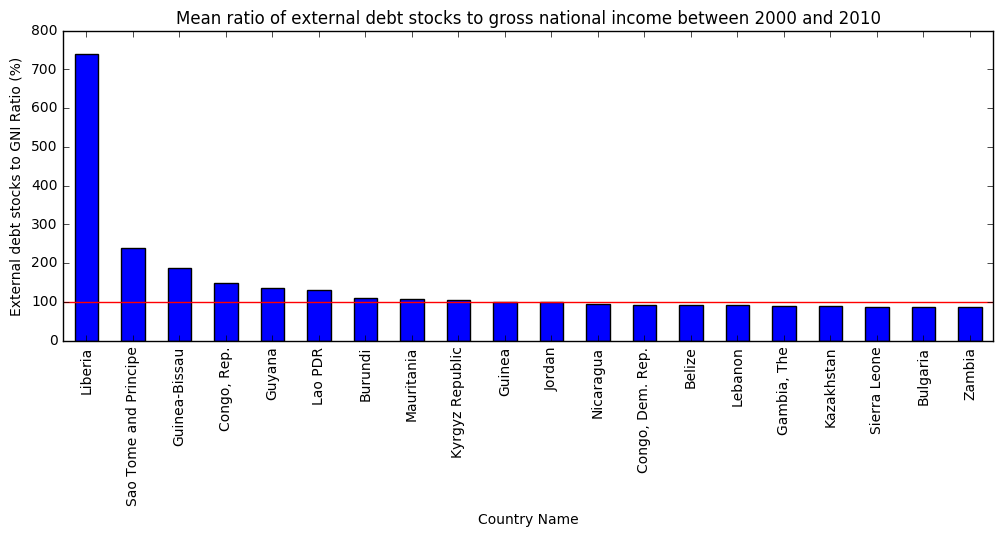

In [42]:
((((debt_gni_2010_bycountry.mean(axis=1)).sort_values(ascending = False)).head(20))).plot(kind='bar')
plt.axhline(y=100, color='r', linestyle='-')
plt.ylabel('External debt stocks to GNI Ratio (%)')
plt.title('Mean ratio of external debt stocks to gross national income between 2000 and 2010')

*Los países que sobrepasan la línea roja son aquéllos que, en media durante el período 2000-2010, han generado un PIB inferior al montante de la deuda, es decir, ni la totalidad de sus ingresos brutos sería capaz de saldarla.*

**Buscar y comentar alguna relación entre agregados económicos de los que aparecen
en el dataset (excluyendo el GNI) y algún componente de la deuda. Utilizar correlaciones y en su
caso modelos lineales básicos.**

*Exports of goods, services, and primary income BX.GSR.TOTL.CD*

In [43]:
exports = debt[debt['Indicator Code']=='BX.GSR.TOTL.CD']

In [44]:
exports

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
43,Afghanistan,AFG,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,Albania,ALB,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,Algeria,DZA,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,All developing countries,LMY,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,Angola,AGO,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,Armenia,ARM,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,Azerbaijan,AZE,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1541,Bangladesh,BGD,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,Belarus,BLR,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,Belize,BLZ,"Exports of goods, services and primary income ...",BX.GSR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ext_debt

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 59
53,Afghanistan,AFG,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Albania,ALB,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,Algeria,DZA,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,9.395590e+08,1.260811e+09,1.549797e+09,2.991380e+09,3.365978e+09,4.632813e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,All developing countries,LMY,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,5.931777e+10,6.984151e+10,8.178557e+10,9.930977e+10,1.251400e+11,1.546356e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,Angola,AGO,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123,Armenia,ARM,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,Azerbaijan,AZE,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551,Bangladesh,BGD,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,1.465040e+08,4.978210e+08,1.257485e+09,1.680487e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1765,Belarus,BLR,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,Belize,BLZ,"External debt stocks, total (DOD, current US$)",DT.DOD.DECT.CD,4.085000e+06,4.339000e+06,5.070000e+06,4.826000e+06,5.274000e+06,4.827000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
exports_debt = pd.concat([exports,ext_debt])

In [47]:
export_debt = exports_debt.set_index(['Indicator Code', 'Country Name'])

In [48]:
export_debt

Country Code  \
Indicator Code Country Name                                  
BX.GSR.TOTL.CD Afghanistan                             AFG   
               Albania                                 ALB   
               Algeria                                 DZA   
               All developing countries                LMY   
               Angola                                  AGO   
               Armenia                                 ARM   
               Azerbaijan                              AZE   
               Bangladesh                              BGD   
               Belarus                                 BLR   
               Belize                                  BLZ   
               Benin                                   BEN   
               Bhutan                                  BTN   
               Bolivia                                 BOL   
               Bosnia and Herzegovina                  BIH   
               Botswana                                BWA   
               Brazil                                  BRA   
               Bulgaria                                BGR   
               Burkina Faso                            BFA   
               Burundi                                 BDI   
               Cabo Verde                              CPV   
               Cambodia                                KHM   
               Cameroon                                CMR   
               Central African Republic                CAF   
               Chad                                    TCD   
               China                                   CHN   
               Colombia                                COL   
               Comoros                                 COM   
               Congo, Dem. Rep.                        ZAR   
               Congo, Rep.                             COG   
               Costa Rica                              CRI   
...                                                    ...   
DT.DOD.DECT.CD Serbia                                  SRB   
               Sierra Leone                            SLE   
               Solomon Islands                         SLB   
               Somalia                                 SOM   
               South Africa                            ZAF   
               South Asia                              SAS   
               Sri Lanka                               LKA   
               St. Lucia                               LCA   
               St. Vincent and the Grenadines          VCT   
               Sub-Saharan Africa                      SSA   
               Sudan                                   SDN   
               Swaziland                               SWZ   
               Syrian Arab Republic                    SYR   
               Tajikistan                              TJK   
               Tanzania                                TZA   
               Thailand                                THA   
               Togo                                    TGO   
               Tonga                                   TON   
               Tunisia                                 TUN   
               Turkey                                  TUR   
               Turkmenistan                            TKM   
               Uganda                                  UGA   
               Ukraine                                 UKR   
               Upper middle income                     UMC   
               Uzbekistan                              UZB   
               Vanuatu                                 VUT   
               Vietnam                                 VNM   
               Yemen, Rep.                             YEM   
               Zambia                                  ZMB   
               Zimbabwe                                ZWE   

                                                                                  Indicator Name  \
Indicator Code Country Name            

In [49]:
export_debt_2010 = export_debt[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

In [50]:
debt_bycountry = export_debt_2010.ix['DT.DOD.DECT.CD'].mean(axis=1)

In [51]:
exp_bycountry = export_debt_2010.ix['BX.GSR.TOTL.CD'].mean(axis=1)

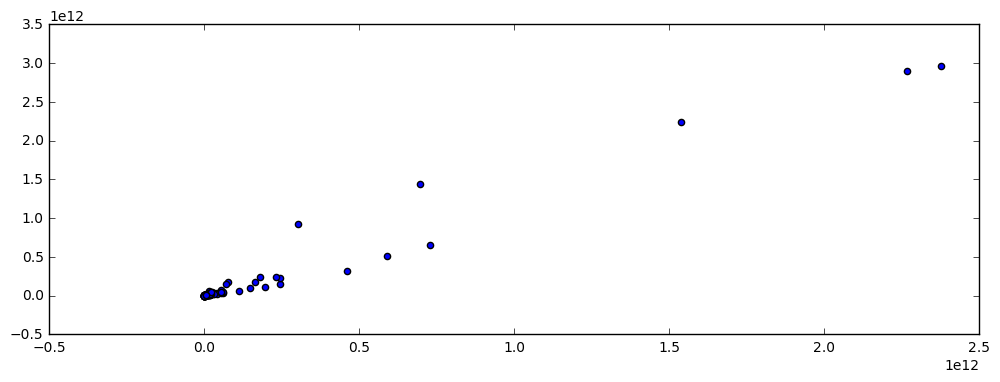

In [52]:
plt.scatter(debt_bycountry, exp_bycountry)

In [53]:
debt_exp = pd.concat((debt_bycountry,exp_bycountry), axis=1)

In [54]:
debt_exp.columns = ['DT.DOD.DECT.CD','BX.GSR.TOTL.CD']

In [55]:
debt_exp

,DT.DOD.DECT.CD,BX.GSR.TOTL.CD
Country Name,,
Afghanistan,2.001830e+09,2.800399e+09
Albania,2.530005e+09,2.153314e+09
Algeria,1.522892e+10,6.365366e+10
All developing countries,2.377824e+12,2.960067e+12
Angola,1.182253e+10,2.800488e+10
Armenia,2.750265e+09,1.864454e+09
Azerbaijan,3.026473e+09,1.312927e+10
Bangladesh,1.985474e+10,1.250310e+10
Belarus,9.726885e+09,1.920355e+10


*Deuda media contraída durante 2000-2010*

In [56]:
debt_exp['DT.DOD.DECT.CD'].sort_values(ascending=False).head(25)

Country Name
All developing countries      2.377824e+12
Middle income                 2.265870e+12
Upper middle income           1.536578e+12
Lower middle income           7.292913e+11
East Asia & Pacific           6.961073e+11
Latin America & Caribbean     5.892704e+11
Europe & Central Asia         4.618358e+11
China                         3.021486e+11
South Asia                    2.442345e+11
Brazil                        2.435461e+11
Sub-Saharan Africa            2.320874e+11
Turkey                        1.968738e+11
Mexico                        1.793861e+11
India                         1.644321e+11
Middle East & North Africa    1.542885e+11
Indonesia                     1.487774e+11
Low income                    1.119542e+11
Malaysia                      7.511053e+10
Thailand                      6.947899e+10
Philippines                   5.960248e+10
Kazakhstan                    5.938607e+10
Ukraine                       5.533915e+10
Romania                       5.444674e+1

*Media en términos de exportaciones de bienes, servicios e ingresos primarios durante 2000-2010.*

In [57]:
debt_exp['BX.GSR.TOTL.CD'].sort_values(ascending=False).head(25)

Country Name
All developing countries     2.960067e+12
Middle income                2.898919e+12
Upper middle income          2.239028e+12
East Asia & Pacific          1.439021e+12
China                        9.177542e+11
Lower middle income          6.582904e+11
Latin America & Caribbean    5.116388e+11
Europe & Central Asia        3.150967e+11
Sub-Saharan Africa           2.399276e+11
Mexico                       2.389257e+11
South Asia                   2.232745e+11
India                        1.798976e+11
Malaysia                     1.688204e+11
Brazil                       1.434354e+11
Thailand                     1.428567e+11
Turkey                       1.103234e+11
Indonesia                    1.035053e+11
South Africa                 7.233988e+10
Algeria                      6.365366e+10
Low income                   6.221862e+10
Nigeria                      4.955697e+10
Philippines                  4.704104e+10
Ukraine                      4.621855e+10
Vietnam              

In [58]:
debt_exp.isnull().sum()

DT.DOD.DECT.CD    0
BX.GSR.TOTL.CD    7
dtype: int64

In [59]:
debt_exp_nona = debt_exp.dropna(how='any')

In [60]:
debt_exp_nona[['DT.DOD.DECT.CD','BX.GSR.TOTL.CD']].corr(method='pearson')

,DT.DOD.DECT.CD,BX.GSR.TOTL.CD
DT.DOD.DECT.CD,1.000000,0.980127
BX.GSR.TOTL.CD,0.980127,1.000000


In [61]:
from scipy.stats import linregress
lr2 = linregress(debt_exp_nona['BX.GSR.TOTL.CD'], debt_exp_nona['DT.DOD.DECT.CD'])
lr2

LinregressResult(slope=0.74262328653414489, intercept=6926994205.943512, rvalue=0.98012673986706489, pvalue=1.442557311794389e-87, stderr=0.013607785759461416)

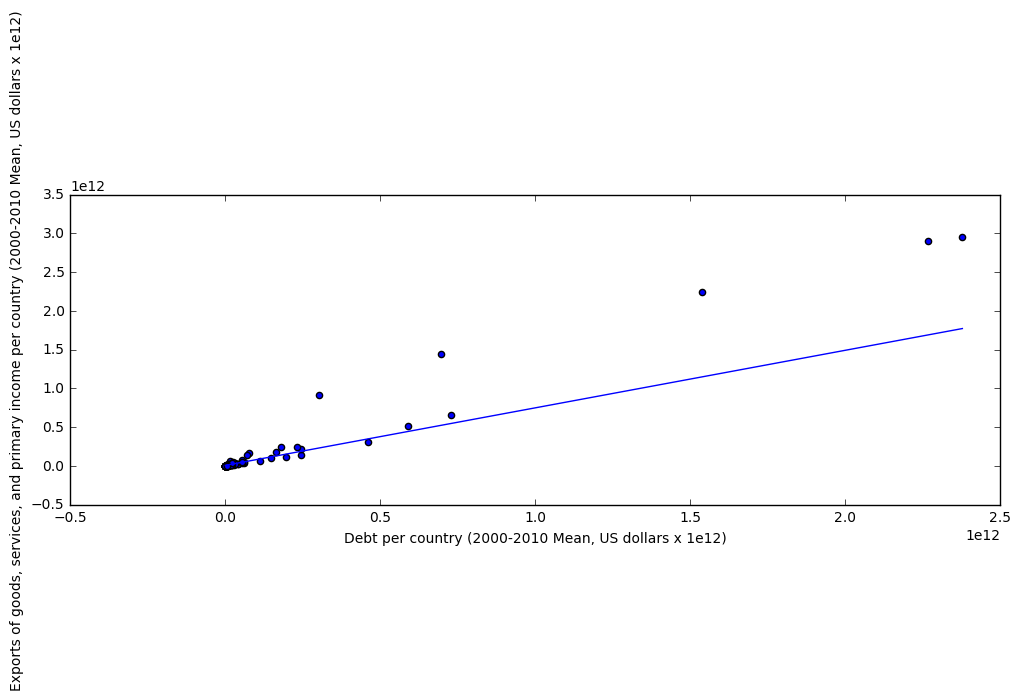

In [62]:
x2 = np.linspace(debt_exp_nona['DT.DOD.DECT.CD'].min(),debt_exp_nona['DT.DOD.DECT.CD'].max())
y2 = lr2[0]*x2 + lr2[1]
plt.scatter(debt_exp_nona['DT.DOD.DECT.CD'], debt_exp_nona['BX.GSR.TOTL.CD'])
plt.plot(x2, y2)
plt.ylabel('Exports of goods, services, and primary income per country (2000-2010 Mean, US dollars x 1e12)')
plt.xlabel('Debt per country (2000-2010 Mean, US dollars x 1e12)')

*Para ilustrar la explicación de las exportaciones en función de la deuda contraída (y = f(x)) me gustaría citar una idea del analista Ignacio Ramonet:*

*Usted para comprar un piso, pide un crédito de 20 millones con un interés al 5 %, pero a los tres meses el banco le sube el interés al 8 % y uno no puede quejarse. A los 6 meses, se lo sube al 20 %, con lo que el préstamo que pidió podría haberlo pagado pero con este ya no puede […] Esto es lo que ha pasado con la deuda externa. […] Ahora [los países pobres] están obligados a exportar con el objetivo de conseguir divisas para pagar los intereses de su deuda exterior. De esta forma, el país está volcado al comercio exterior y ello le impide ocuparse de su mercado interior.*